In [1]:
# --- ETAPA 1: IMPORTAÇÃO DAS BIBLIOTECAS ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Configuração do estilo dos gráficos para um visual mais profissional
sns.set_style("whitegrid")

In [4]:
# --- ETAPA 2: CARREGAMENTO E DIAGNÓSTICO DOS DADOS ---
print("--- 2. Carregamento e Diagnóstico ---")
# Carregamento do dataset
# Foi necessário usar o encoding 'latin1' devido a caracteres especiais no arquivo.
dataset = pd.read_csv("bi.csv", sep=",", encoding='latin1')
display(dataset)

# Diagnóstico inicial
print("Estrutura e Tipos de Dados:")
dataset.info()
print("\nContagem de valores nulos antes da limpeza:")
print(dataset.isnull().sum())
print("\n")

--- 2. Carregamento e Diagnóstico ---


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


Estrutura e Tipos de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB

Contagem de valores nulos antes da limpeza:
fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2


In [5]:
# --- ETAPA 3: LIMPEZA E PRÉ-PROCESSAMENTO DOS DADOS ---
print("--- 3. Limpeza e Pré-Processamento ---")
# 3.1. Tratamento de Valores Nulos na coluna 'Python'
media_python = dataset['Python'].mean()
dataset['Python'] = dataset['Python'].fillna(media_python)

# 3.2. Padronização de Colunas Categóricas
mapa_genero = {'M': 'Male', 'F': 'Female', 'female': 'Female', 'male': 'Male'}
dataset['gender'] = dataset['gender'].replace(mapa_genero)

mapa_educacao = {'HighSchool': 'High School', 'Barrrchelors': 'Bachelors', 'diploma': 'Diploma', 'DIPLOMA': 'Diploma', 'Diplomaaa': 'Diploma'}
dataset['prevEducation'] = dataset['prevEducation'].replace(mapa_educacao)

mapa_paises = {'Norge': 'Norway', 'RSA': 'South Africa', 'UK': 'United Kingdom', 'norway': 'Norway', 'Rsa': 'South Africa'}
dataset['country'] = dataset['country'].replace(mapa_paises)

mapa_residencia = {'BI-Residence': 'BI Residence', 'BIResidence': 'BI Residence', 'BI_Residence': 'BI Residence', 'Sognsvann': 'Private'}
dataset['residence'] = dataset['residence'].replace(mapa_residencia)

# 3.3. Remoção de Colunas Irrelevantes
dataset = dataset.drop(columns=['fNAME', 'lNAME'])

print("Limpeza concluída. Verificação de valores nulos pós-limpeza:")
# Deve retornar 0 se tudo foi preenchido
print(f"Total de valores nulos restantes: {dataset.isnull().sum().sum()}")
print("\n")

--- 3. Limpeza e Pré-Processamento ---
Limpeza concluída. Verificação de valores nulos pós-limpeza:
Total de valores nulos restantes: 0




--- 4. Análise Exploratória (Gráficos) ---


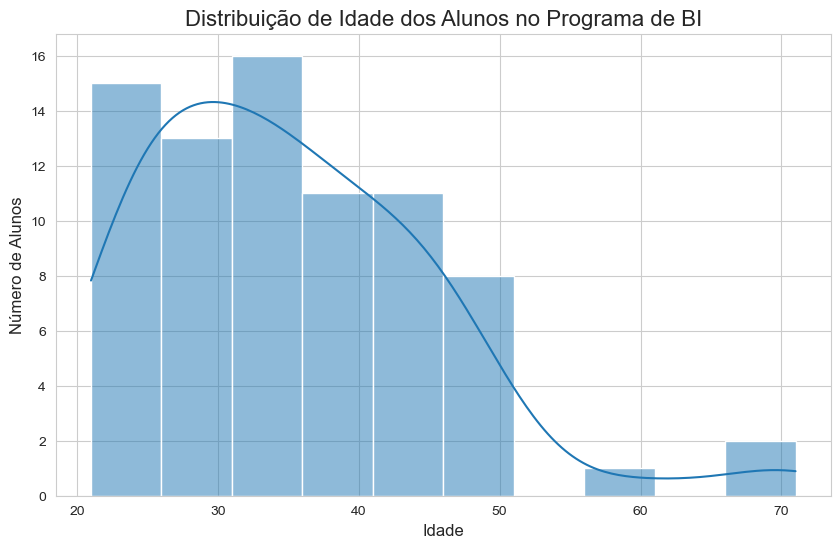

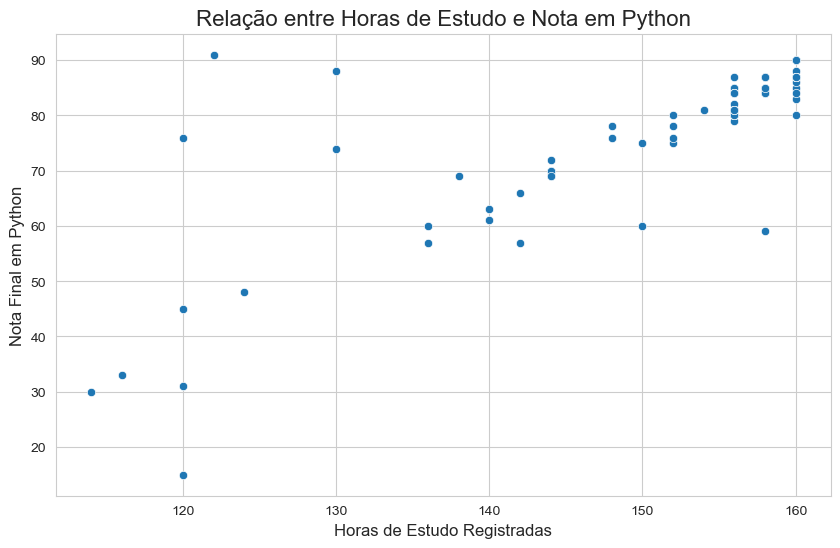

In [6]:
# --- ETAPA 4: ANÁLISE EXPLORATÓRIA DE DADOS (EDA) ---
print("--- 4. Análise Exploratória (Gráficos) ---")
# Gráfico 1: Distribuição de Idade dos Alunos
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Age', bins=10, kde=True)
plt.title('Distribuição de Idade dos Alunos no Programa de BI', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.show()

# Gráfico 2: Relação entre Horas de Estudo e Nota em Python
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='studyHOURS', y='Python')
plt.title('Relação entre Horas de Estudo e Nota em Python', fontsize=16)
plt.xlabel('Horas de Estudo Registradas', fontsize=12)
plt.ylabel('Nota Final em Python', fontsize=12)
plt.show()

--- 5. Modelagem Preditiva ---

Comparação de Performance dos Modelos (R²):
  - Regressão Linear: 0.6694
  - Random Forest: 0.5113



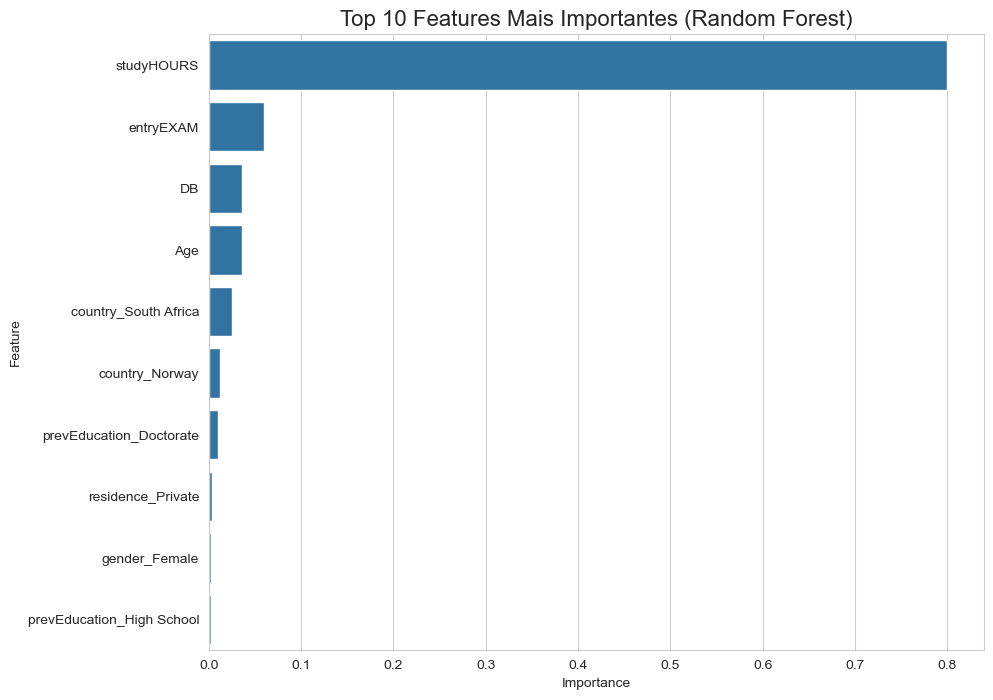

In [7]:
# --- ETAPA 5: MODELAGEM PREDITIVA ---
print("--- 5. Modelagem Preditiva ---")
# 5.1. Preparação dos Dados para Modelagem
X = dataset.drop('Python', axis=1)
y = dataset['Python']
X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 5.2. Treinamento e Avaliação do Modelo de Regressão Linear (Baseline)
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
previsoes_lr = modelo_lr.predict(X_test)
r2_lr = r2_score(y_test, previsoes_lr)

# 5.3. Treinamento e Avaliação do Modelo Random Forest
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)
previsoes_rf = modelo_rf.predict(X_test)
r2_rf = r2_score(y_test, previsoes_rf)

print("\nComparação de Performance dos Modelos (R²):")
print(f"  - Regressão Linear: {r2_lr:.4f}")
print(f"  - Random Forest: {r2_rf:.4f}\n")


# 5.4. Análise de Importância de Features (com o modelo Random Forest)
importancias = modelo_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importancias
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10)) # Mostrando apenas as 10 mais importantes
plt.title('Top 10 Features Mais Importantes (Random Forest)', fontsize=16)
plt.show()